<a href="https://colab.research.google.com/github/MiroRavaProj/RoboLLM/blob/main/TimeSeriesForecasting/W1/TS_visualization_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis and modeling - Python
In this lesson we will go through an example of exploratory analyisis and time series modeling with python. We will usa a dataset containing power measurements and meteorological forecasts relative to a set of 24 power meters located in Rolle (Switzerland).

<img src="https://raw.githubusercontent.com/nepslor/teaching/main/TimeSeriesForecasting/figs/REeL_Demo_grid.png" width="500"/>

The power measurements include mean active and reactive power, voltage magnitude and maximum total harmonic distortion (THD) for each phase, voltage frequency $\omega$ and the average power over the three phases, $P_{mean}$.
The meteorological forecasts include the temperature, global
horizontal and normal irradiance (GHI and GNI, respectively),
the relative humidity (RH) pressure and wind speed and
direction (Ws and Wdir, respectively).
<img src="https://raw.githubusercontent.com/nepslor/teaching/main/TimeSeriesForecasting/figs/REeL_data.png" width="500"/>

We start importing and installing required packages, and reading the data [stored on Zenodo](https://zenodo.org/record/3463137#.Y_COj9LMKV4)

In [2]:
%%capture
!pip install wget
!pip install statsmodels==0.12.2
!pip install tabulate
import pandas as pd
import wget
import numpy as np

The dataframe contains a set of power series from different meters and the most updated forecasts of the global horizontal irradiance (GHI) and the temperature (T), povided by a numerical weather prediction service. Let's print some rows...

In [3]:
data = pd.read_pickle(wget.download("https://zenodo.org/record/4549296/files/reduced_dataset.pk?download=1"));
data.head()

,0307a3cec15787560b7d0ba094f74d1decb2fa72,0f415416ff153479d65f54df3fa9974af46e3a89,1caab5f0e80231e1c6fdefc00edec4fdb6a02c5f,27fbb11689277a30f5db9c71b42e1d3826bd34ff,2ce3e7e1a5365dc54c7f4fc6284f0052397702b9,2d837275047e5fdce39fda42b541dbf6c858a4d1,350c6b9720ebb1e1a04e8f88ad0fa114c2af77b3,39f06481738604cb5916dce15639e380514b99ca,432650b919537d23cb4054fdb85a07eecaa4524c,49228b90116c6075fabcd8a1cf0e48e016373614,...,fe2245a4afe0afc24d215dd4abd2ffb34610dd27,all,S1,S2,S11,S12,S21,S22,ghi_backwards,temperature
2018-01-13 00:10:00+00:00,9.786000,20.518000,10.653333,19.190333,23.088333,41.712000,24.278000,12.349333,28.300333,11.307000,...,17.921333,581.757667,246.314000,335.443667,124.948000,121.366000,167.890667,167.553000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0361272897446...","[3.6288461538461543, 3.589157030333501, 3.4878..."
2018-01-13 00:20:00+00:00,11.190000,20.086333,9.367333,19.794000,22.374667,43.572667,23.853333,10.230667,30.275333,13.225333,...,16.359333,580.896333,250.185333,330.711000,126.385000,123.800333,165.354333,165.356667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9360517716272...","[3.6256410256410265, 3.5733366851013924, 3.477..."
2018-01-13 00:30:00+00:00,10.712333,19.977333,12.999333,19.607000,22.249000,39.306333,23.938667,10.445000,31.299667,11.968000,...,16.344667,579.949667,250.906000,329.043667,124.851333,126.054667,163.161000,165.882667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.3870873646209...","[3.620769230769231, 3.554524886877828, 3.46849..."
2018-01-13 00:40:00+00:00,12.445000,20.049667,11.751333,19.233333,22.755333,35.916333,24.074000,9.907000,29.984000,12.003667,...,24.532000,569.836667,247.367333,322.469333,122.151000,125.216333,167.244000,155.225333,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.076547987698...","[3.6146153846153846, 3.53470755823697, 3.45838..."
2018-01-13 00:50:00+00:00,10.487000,19.225333,10.183667,20.226667,22.375333,36.360000,25.039667,10.479667,32.333000,11.688000,...,19.819333,552.787667,246.735000,306.052667,118.858000,127.877000,169.919333,136.133333,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.691747559834...","[3.6075641025641025, 3.515870621752975, 3.4460..."


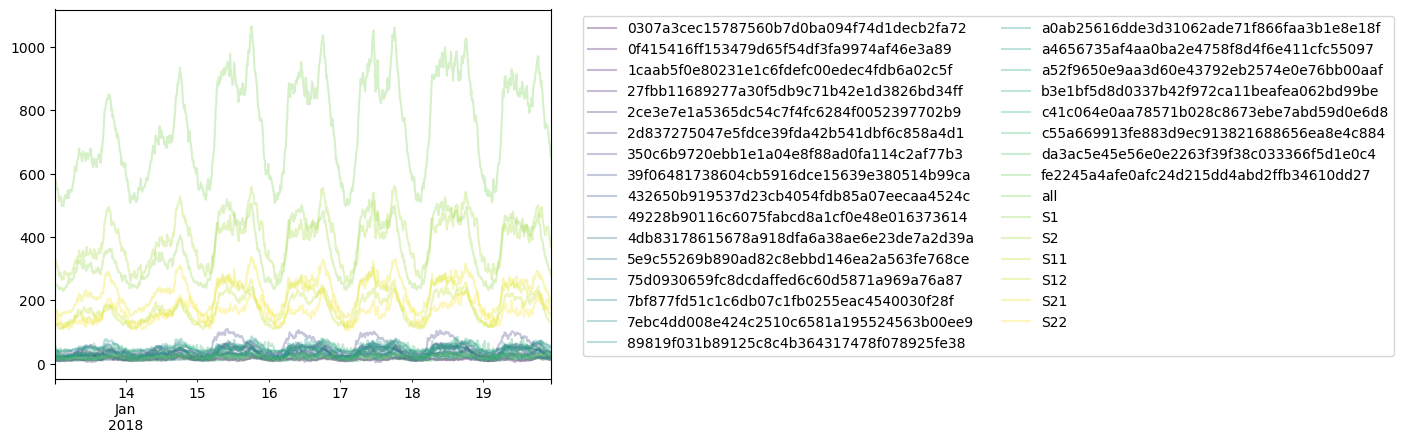

In [4]:
import matplotlib.pyplot as plt

# select just the electric meter time series
plot_these = [n for n in data.columns if n not in ["ghi_backwards", "temperature"]]

# plot the first 1000 points with transparency 0.3 and using a specific colormap
data[plot_these].iloc[:1000,:].plot(alpha=0.3, cmap=plt.get_cmap('viridis'))

# add some specs for the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

The data pd.DataFrame contains power signals from 24 secondary substations, and a list of their aggregations (S11,S12..) and the overall sum (all). We will focus on the prediction of the total aggregated power, so we discard the rest. For sake of simplicity, we will also downsample the dataframe to 1 hour sampling time. This is just a practical choice to avoid to use excessive computational power and ease the visualization of the different variables; it doesn't impact any following consideration.  

In [5]:
samples_per_day = 24

# create 1-hour means of the original time series
p_all = data['all'].resample('1h', origin='start').mean()

# since NWP forecasts are provided as vectors we won't mediate them but take one row in 6 (= instantaneous hourly prediction)
data = pd.concat([p_all,data['ghi_backwards'].iloc[::6], data['temperature'].iloc[::6]], axis=1)
data.head()

,all,ghi_backwards,temperature
2018-01-13 00:10:00+00:00,569.445444,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0361272897446...","[3.6288461538461543, 3.589157030333501, 3.4878..."
2018-01-13 01:10:00+00:00,528.453278,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0361272897446183, ...","[3.589157030333501, 3.4878365352875162, 3.4057..."
2018-01-13 02:10:00+00:00,507.449722,"[0.0, 0.0, 0.0, 0.0, 1.0361272897446183, 38.77...","[3.4878365352875162, 3.405724059468352, 3.1049..."
2018-01-13 03:10:00+00:00,525.023444,"[0.0, 0.0, 0.0, 1.0361272897446183, 38.7799425...","[3.405724059468352, 3.1049134528586584, 2.6353..."
2018-01-13 04:10:00+00:00,534.641833,"[0.0, 0.0, 1.0361272897446183, 38.779942577378...","[3.1049134528586584, 2.635389610389611, 2.4121..."


## ❓ Auto Correlation Function
The Auto Correlation Function (ACF), $\rho_k$, returns the normalized correlation of a signal with itself at lag $k$.

Try to plot the autocorrelation function for different lags $k$ for the 'all' signal. You can use the `.autocorr` pandas function.

In [ ]:
# Plotting ACF for the four signals

# Plotting the associated time series



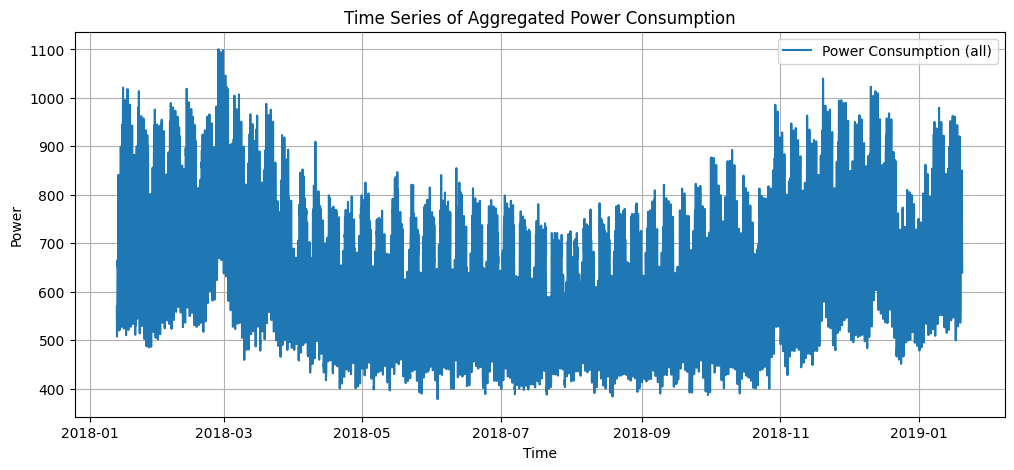

<Figure size 1000x500 with 0 Axes>

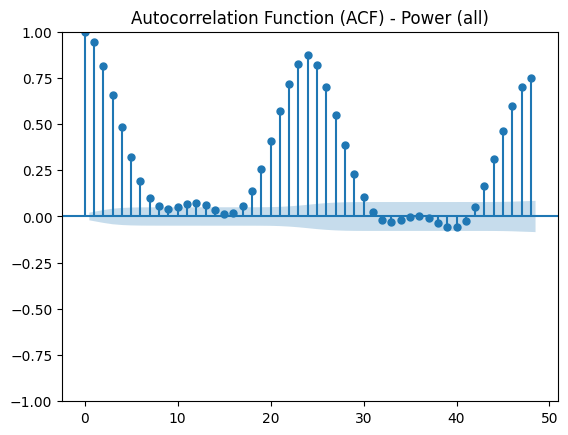

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Selezioniamo la serie temporale della potenza aggregata
power_series = data['all']

# Creiamo il plot della serie temporale
plt.figure(figsize=(12, 5))
plt.plot(power_series, color='tab:blue', label="Power Consumption (all)")
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Time Series of Aggregated Power Consumption")
plt.legend()
plt.grid()
plt.show()

# Creiamo il plot della funzione di autocorrelazione
plt.figure(figsize=(10, 5))
plot_acf(power_series, lags=48, title="Autocorrelation Function (ACF) - Power (all)")
plt.show()


Strong seasonalities can be spotted at 24 hours intervals, with a second local maximum after 7 days (the second dashed vertical line), indicating a strong weekly seasonality. As a comparison, the orange and the green lines represent the autocorrelations of white noise (iid samples from a noraml distribution) and of brownian motion.


## ❓ Embeddings
We can now try to use the two local maxima as embedding for the time series, and try to see if the signal can be compressed. Try to obtain two matrices, d_mat and weeks_mat, using 24 and 24*7 steps as embedding dimension (corresponding to the first two maxima of the auto correlation function) and plot the resulting matrices as a picture.


In [ ]:

l = len(data['all'])
n_max = int(l/(samples_per_day*7))*samples_per_day*7
# d_mat = ?       # complete this line
# weeks_mat = ?   # complete this line

plt.matshow(d_mat, aspect='auto')
plt.xlabel('days')
plt.ylabel('time from midnight [1 h]')
plt.colorbar(label='total power [kW]');

The above picture can be interpreted as following: the columns of the above matrix represent days, while its rows correspond to different times of a given day. We can observe how daily peaks (lighter pixels) usually occurs at the same time of the day. At the same time we observe the daylight saving shift, meaning that the timestamp of the data is in UTC. This means that if we want to use the hour of the day as an explanatory variable we should transform the timestamp in localtime first. Now let's try to plot the same data as time series, using both one day and one week as embedding, to see if we can gain more insight.

In [ ]:
colors = plt.get_cmap('plasma',7)
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(wspace=0)
[ax[0].plot(d_mat[:, i::7], c=colors(1 if i>1 else 3), alpha=0.1) for i in range(7)];
ax[0].set_xlim(0,samples_per_day-1)
ax[0].set_xlabel('day time [10 mins]')
ax[0].set_ylabel('P [kW]')
ax[0].set_title('daily time series')


ax[1].plot(weeks_mat, alpha=0.1, color=colors(0));
[ax[1].axvspan(samples_per_day*i, samples_per_day*(i+1), alpha=0.1, color=colors(1 if i>1 else 3)) for i in range(7)];
ax[1].set_xlim(0,samples_per_day*7-1)
ax[1].set_yticks([]);
ax[1].set_xlabel('week time [10 mins]');
ax[1].set_title('weekly time series');


In the above picture the data embedding dimension is 24 and 168, for the right and left panels, respectively. We can see how daily data is highly self-similar, but two clusters can be distinguished: weekdays and weekends. The same can be observed looking at the 7 days embedding (left), where the red vertical bands corresponds to weekends. This kind of visualization guides us in the choice of the forecasting model: we can already see how a simple AR model will probably perform poorly if we do not include 168 autoregressive steps. More on this later on. Let's now visualize interactions between the variable, its lag at -1 day, and the meteorological variables in the dataset. We resample the data to 1 hour sampling time to avoid eccessive computational time in the visualization.

In [ ]:
import seaborn as sb
all_1d_delay = np.roll(data[['all']].values, shift=samples_per_day)[samples_per_day:]                              # np.roll shifts the array by "shift" steps
ghi = np.vstack(data['ghi_backwards'])[samples_per_day:,[0]]
temperature = np.vstack(data['temperature'])[samples_per_day:,[0]]
plot_data = pd.DataFrame(np.hstack([data[['all']].values[samples_per_day:],all_1d_delay,
                                    ghi, temperature]), columns
                         =['all', 'all d-1','ghi', 'T'], index=data.index[samples_per_day:])
sb.pairplot(plot_data,plot_kws={"s": 3, "alpha":0.2})


We can see how the power at current time is highly correlated with its daily lag, as we expected to see from the ACF plot. We can observe also a slightly negative correlation with the temperature predicted by the NWP service for the next hour. This can indicate the presence of electric-based heating, like heat pumps. On the other hand, we cannot spot an evident correlation with the solar irradiation, which means no relevant amount of PVs power plants are installed in this grid.


#❓Some exploratory analysis
* Among the bottom time series, find the most similar and most dissimilar couples
* Look at the most dissimilar couple. Try to scatter them against the values of the predicted GHI
* Can you spot other series for which the GHI has a similar effect?
